# Scipy

Basic functions of the `scipy` library.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Optimization

In [3]:
from scipy.optimize import minimize

Minimize some function.
For example:

$$ f(x) = x^2 + 10 \sin(x) $$

Minimum at x=[-1.30644012]


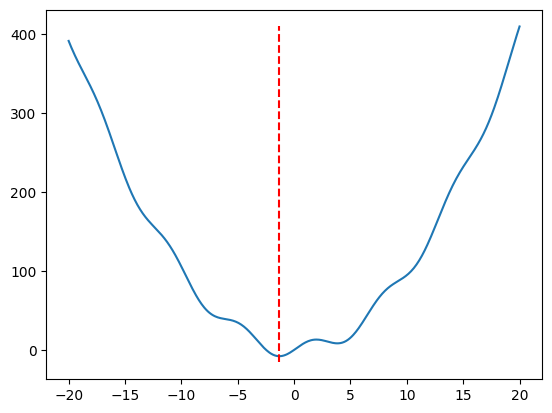

In [4]:
# Define the function to be minimized
def f(x):
	return x**2 + 10*np.sin(x)

result = minimize(f, x0=0)
print(f"Minimum at x={result.x}")

# Plot the function
x = np.linspace(-20, 20, 500)
y = f(x)

plt.plot(x, y)
plt.vlines(result.x, ymin=y.min()*2, ymax=y.max(), color='red', linestyle='dashed')
plt.show()

## Differential equations

Solve the following differential equation:

$$ \frac{dy}{dt} = A\cdot y \cdot e^{-kt} \cdot \sin(B\cdot t) $$

In [79]:
# Define the state vector
def dSdt(S, t, k, A, B):
	y = S
	dydt = A*y*np.exp(-k*t)*np.sin(B*t)
	return dydt

In [80]:
# Define the parameters
k = 1
A = 0.5
B = -3
# Define the 'time span'
t = np.linspace(0, 40, 1001)

# Define the initial condition
y0 = 1

In [81]:
from scipy.integrate import odeint

# Solve the ODE
sol = odeint(dSdt, y0, t, args=(k, A, B))

In [82]:
sol.T.shape 

(1, 1001)

In [83]:
y = sol.T[0]

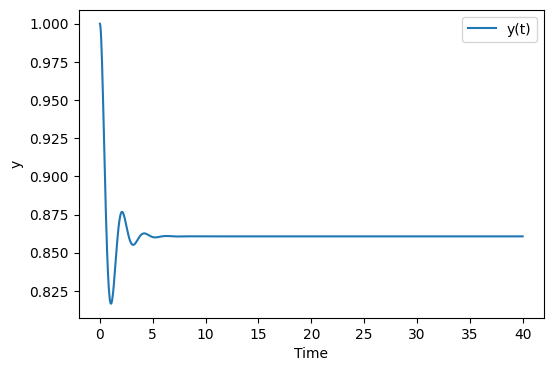

In [84]:
def plot(t, y):
	plt.figure(figsize=(6, 4))
	plt.plot(t, y, label='y(t)')
	plt.xlabel('Time')
	plt.ylabel('y')
	plt.legend()
	plt.show()

plot(t, y)

Taking inspiration in this paper: [Dynamical Models of Happiness](https://sprott.physics.wisc.edu/pubs/paper281.pdf).

The differential equation to solve is the *Van der Pol oscillator*:

$$ \frac{d^2x}{dt^2} - \mu(1-x^2)\frac{dx}{dt} + x = F(t) $$

This is a second order differential equation, so we need to transform it into a system of first order differential equations. Taking $F(t) = 0$:

Let $y_0 = x$ and $y_1 = \frac{dx}{dt}$, then:

$$ \frac{dy_0}{dt} = y_1 $$
$$ \frac{dy_1}{dt} = \mu(1-y_0^2)y_1 - y_0 $$



In [89]:
# S = (y_0, y_1)
# Parameters = (mu)

def dSdt(S, t, mu):
	y_0, y_1 = S
	dy_0dt = y_1
	dy_1dt = mu*(1 - y_0**2)*y_1 - y_0
	return [dy_0dt, dy_1dt]

# Define the parameters
mu = -0.2

# Define the 'time span'
t = np.linspace(0, 40, 1001)

# Define the initial condition
S0 = [1, 0] # y_0(0) = 1, y_1(0) = 0

In [90]:
sol = odeint(dSdt, S0, t, args=(mu,))
y_0 = sol.T[0]
y_1 = sol.T[1]

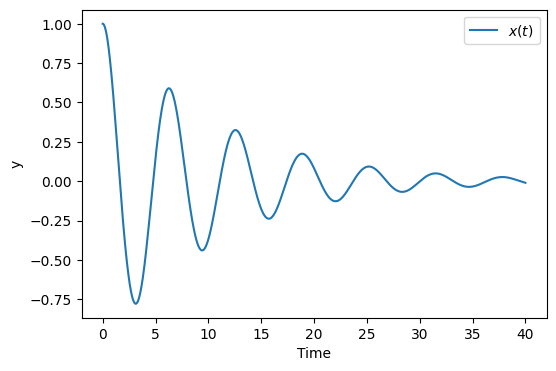

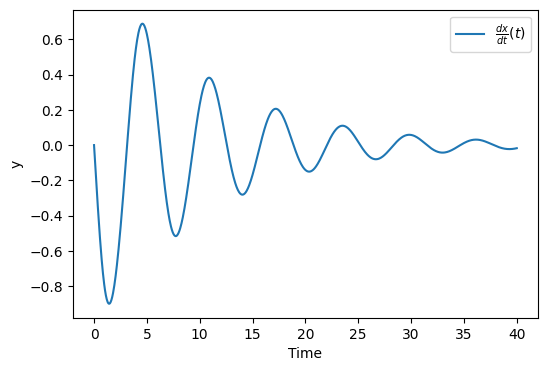

In [94]:
plt.figure(figsize=(6, 4))
plt.plot(t, y_0, label='$x(t)$')
plt.xlabel('Time')
plt.ylabel('y')
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(t, y_1, label='$\\frac{dx}{dt}(t)$')
plt.xlabel('Time')
plt.ylabel('y')
plt.legend()
plt.show()
